# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия, Сергевнин Дмитрий. Вариант №12


## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

**Выборка** - подмножество элементов, взятых из генеральной совокупности, которое используется для получения информации о данной совокупности.

**Генеральная совокупность** - полный набор всех объектов или событий, о которых вы хотите сделать выводы.

**Статистический ряд** - последовательность элементов выборки, расположенных в порядке их получения.

**Ранжированный ряд** - это упорядоченный список значений из выборки или генеральной совокупности по возрастанию или убыванию.

**Вариационный ряд** - это ряд, в котором данные представлены в виде уникальных значений, отсортированных по возрастанию или убыванию.

**Интервальный ряд** – это представление данных в виде интервалов, в которых группируются значения, чтобы облегчить их анализ.

Количество интервалов $k$ зависит от объема выборки $N$ и может быть вычислено по формуле Стерджесса:
$$k = 1+3.31*lgN$$
Полученное значение округляется до целого. Рекомендуется выбирать нечетное количество интервалов.

**Эмпирическая функция распределения** называют функцию $F^*(x)$, определяющую для каждого значения $x$ относительную частоту событий $X < x$.


## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


**Пункт 1-2**

Язык программирования: Python, т.к. он широко используется в обработке данных.

Ссылка на датасет: https://se.moevm.info/lib/exe/fetch.php/courses:statistical_methods_of_experimental_data_handling:sample.zip

Способ формирования выборки: случайный (с помощью метода df.sample())



In [ ]:
import pandas as pd
import numpy as np
import io
import zipfile
from google.colab import files
import math
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving sample.zip to sample.zip


In [ ]:
# Извлекаем файл sample.csv из архива
with zipfile.ZipFile(io.BytesIO(uploaded['sample.zip']), 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('sample.csv', skiprows=3) # двумерная генеральная совокупность
df

,nu,E
0,480,153.3
1,510,129.4
2,426,119.0
3,482,139.9
4,393,103.2
...,...,...
395,464,143.2
396,444,121.4
397,493,149.7
398,476,143.0


**Пункт 3**

Из генеральной совокупности сформировать выборку из 111 объектов. Способ формирования выборки: случайный (с помощью метода df.sample())

In [ ]:
N = 111
sample = df.sample(n=N, random_state=1)  # random_state для воспроизводимости (дает возможность воспроизводить те же самые случайные результаты при каждом запуске кода)

In [ ]:
sample

,nu,E
398,476,143.0
125,541,146.8
328,428,113.7
339,500,136.6
172,372,81.7
...,...,...
73,390,108.1
233,474,122.6
298,437,115.1
250,434,110.5


**Пункт 4**

Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Интервальный ряд представить в виде таблицы.

In [ ]:
ranked_nu = sample.sort_values(by='nu').reset_index(drop=True)['nu']
ranked_e = sample.sort_values(by='E').reset_index(drop=True)['E']

In [ ]:
print("Ранжированная выборка по nu:")
print(ranked_nu)

Ранжированная выборка по nu:
0      320
1      340
2      345
3      351
4      352
      ... 
106    553
107    560
108    569
109    585
110    591
Name: nu, Length: 111, dtype: int64


In [ ]:
print("Ранжированная выборка по E:")
print(ranked_e)

Ранжированная выборка по E:
0       72.6
1       81.7
2       84.3
3       84.9
4       87.7
       ...  
106    174.6
107    177.0
108    177.7
109    179.0
110    181.0
Name: E, Length: 111, dtype: float64


In [ ]:
# Преобразование ранжированного ряда в вариационный ряд для 'nu'
variation_nu = ranked_nu.value_counts().reset_index()
variation_nu.columns = ['значение', 'частота']
variation_nu_sort = variation_nu.sort_values(by='значение').reset_index(drop=True)
variation_nu_sort.drop(columns=['частота'], inplace=True)


# Преобразование ранжированного ряда в вариационный ряд для 'E'
variation_e = ranked_e.value_counts().reset_index()
variation_e.columns = ['значение', 'частота']
variation_e_sort = variation_e.sort_values(by='значение').reset_index(drop=True)
variation_e_sort.drop(columns=['частота'], inplace=True)

print("Вариационный ряд для 'nu':")
print(variation_nu)

print("Отсортированный вариационный ряд для 'nu':")
print(variation_nu_sort)

print("\nВариационный ряд для 'E':")
print(variation_e)
print("Отсортированный вариационный ряд для 'E':")
print(variation_e_sort)

Вариационный ряд для 'nu':
    значение  частота
0        421        4
1        438        4
2        443        3
3        547        3
4        447        2
..       ...      ...
81       430        1
82       428        1
83       426        1
84       418        1
85       591        1

[86 rows x 2 columns]
Отсортированный вариационный ряд для 'nu':
    значение
0        320
1        340
2        345
3        351
4        352
..       ...
81       553
82       560
83       569
84       585
85       591

[86 rows x 1 columns]

Вариационный ряд для 'E':
     значение  частота
0       110.5        2
1       134.9        2
2       137.3        2
3       120.7        2
4       122.6        2
..        ...      ...
101     114.6        1
102     113.7        1
103     113.5        1
104     109.7        1
105     181.0        1

[106 rows x 2 columns]
Отсортированный вариационный ряд для 'E':
     значение
0        72.6
1        81.7
2        84.3
3        84.9
4        87.7
..        .

In [ ]:
def create_interval_series(variation_series):
    # Определение интервалов
    num_bins = round(1 + 3.31 * math.log10(N))
    if num_bins % 2 == 0:
      num_bins += 1

    bin_width = (variation_series['значение'].max() - variation_series['значение'].min()) / num_bins
    bins = [variation_series['значение'].min() + i * bin_width for i in range(num_bins)]
    bins.append(variation_series['значение'].max())

    # Подсчет частоты попадания в интервалы
    frequency, _ = np.histogram(variation_series['значение'], bins=bins)

    # Определение границ и середин интервалов
    interval_bounds = [(bins[i], bins[i+1]) for i in range(num_bins)]
    interval_midpoints = [(interval[0] + interval[1]) / 2 for interval in interval_bounds]

    interval_series = pd.DataFrame({
        'Границы интервалов': interval_bounds,
        'Середины интервалов': interval_midpoints,
        'Частота попадания в интервал': frequency,
        'Относительная частота': frequency / len(variation_series)
    })

    return interval_series


interval_nu_series = create_interval_series(variation_nu_sort)
interval_nu_series_copy = interval_nu_series.copy()
interval_nu_series_copy['Границы интервалов'] = interval_nu_series['Границы интервалов'].apply(lambda x: f"[{x[0]}, {x[1]})")

interval_e_series = create_interval_series(variation_e_sort)
interval_e_series_copy = interval_e_series.copy()
interval_e_series_copy['Границы интервалов'] = interval_e_series['Границы интервалов'].apply(lambda x: f"[{x[0]}, {x[1]})")

interval_nu_series_copy['Накопительная абсолютная частота'] = interval_nu_series_copy['Частота попадания в интервал'].cumsum()
interval_nu_series_copy['Накопительная относительная частота'] = interval_nu_series_copy['Относительная частота'].cumsum()

interval_e_series_copy['Накопительная абсолютная частота'] = interval_e_series_copy['Частота попадания в интервал'].cumsum()
interval_e_series_copy['Накопительная относительная частота'] = interval_e_series_copy['Относительная частота'].cumsum()
interval_nu_series_copy.index += 1
interval_e_series_copy.index += 1

In [ ]:
print("Интервальный ряд для 'nu':")
print(interval_nu_series_copy.to_string())

Интервальный ряд для 'nu':
                         Границы интервалов  Середины интервалов  Частота попадания в интервал  Относительная частота  Накопительная абсолютная частота  Накопительная относительная частота
1                [320.0, 350.1111111111111)           335.055556                             3               0.034884                                 3                             0.034884
2   [350.1111111111111, 380.22222222222223)           365.166667                             8               0.093023                                11                             0.127907
3   [380.22222222222223, 410.3333333333333)           395.277778                            13               0.151163                                24                             0.279070
4   [410.3333333333333, 440.44444444444446)           425.388889                            12               0.139535                                36                             0.418605
5  [440.44444444444446, 470.

In [ ]:
print("Интервальный ряд для 'E':")
print(interval_e_series_copy.to_string())

Интервальный ряд для 'E':
                         Границы интервалов  Середины интервалов  Частота попадания в интервал  Относительная частота  Накопительная абсолютная частота  Накопительная относительная частота
1                 [72.6, 84.64444444444445)            78.622222                             3               0.028302                                 3                             0.028302
2    [84.64444444444445, 96.68888888888888)            90.666667                            10               0.094340                                13                             0.122642
3   [96.68888888888888, 108.73333333333332)           102.711111                            13               0.122642                                26                             0.245283
4  [108.73333333333332, 120.77777777777777)           114.755556                            13               0.122642                                39                             0.367925
5  [120.77777777777777, 132.8

**Выводы по пункту**

1. Размер первого вариационного ряда почти соответствует размеру исходного ранжированного ряда (86 из 111). Однако размер второго вариационного ряда в два раза меньше размера исходного ранжированного ряда (106 из 111). Исходя из этого, можно сделать вывод, что выборка разнообразна, так как содержит много уникальных элементов.

2. Вычисленные частоты для первого интервального ряда показывают, что наименьшее количество значений находится на краевых интервалах, и количество значений увеличивается по мере приближения к центральным интервалам.

3. Для второго интервального ряда наблюдается подобная тенденция, но максимальная частота смещена от центральных интервалов к начальному интервалу.

**Пункт 5-6**

Для абсолютных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию. Сделать выводы.

In [ ]:
def poligons(df):
  frequencies = df['Частота попадания в интервал']
  mid_intervals = df['Середины интервалов']
  abs_frequencies = df['Относительная частота']
  width = [interval[1] - interval[0] for interval in df['Границы интервалов']]

  # Построение графика
  plt.title('Полигон для абсолютных частот')
  plt.fill_between(mid_intervals, frequencies, alpha=0, where=None)
  plt.plot(mid_intervals, frequencies, alpha=0.6, linewidth=2)
  plt.xlabel('Середины интервалов')
  plt.ylabel('Частота')
  plt.grid(True)
  plt.show()

  plt.title('Полигон для относительных частот')
  plt.fill_between(mid_intervals, abs_frequencies, alpha=0, where=None)
  plt.plot(mid_intervals, abs_frequencies, alpha=0.6, linewidth=2)
  plt.xlabel('Середины интервалов')
  plt.ylabel('Частота')
  plt.grid(True)
  plt.show()



  # Построение гистограммы
  mid_intervals_str = [str(int(i)) for i in mid_intervals]
  plt.bar(mid_intervals_str, abs_frequencies, align='center', alpha=0.75, linewidth=100.0)
  plt.title('Гистограмма абсолютных частот')
  plt.xlabel('Середины интервалов')
  plt.ylabel('Абсолютная частота')
  plt.grid(True)
  plt.show()

  # Построение гистограммы
  plt.bar(mid_intervals_str, frequencies, align='center', alpha=0.75, linewidth=100.0)
  plt.title('Гистограмма относительных частот')
  plt.xlabel('Середины интервалов')
  plt.ylabel('Относительная частота')
  plt.grid(True)
  plt.show()


Для nu


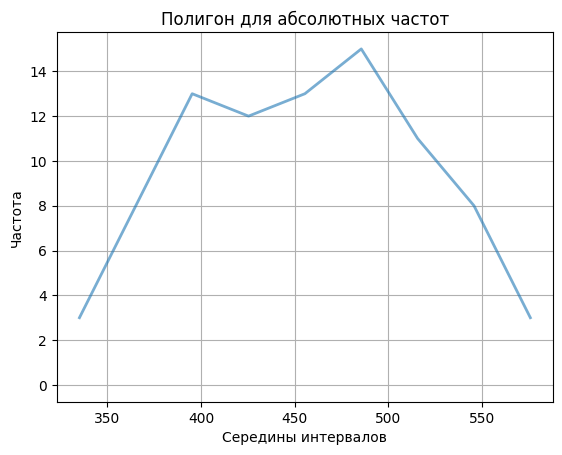

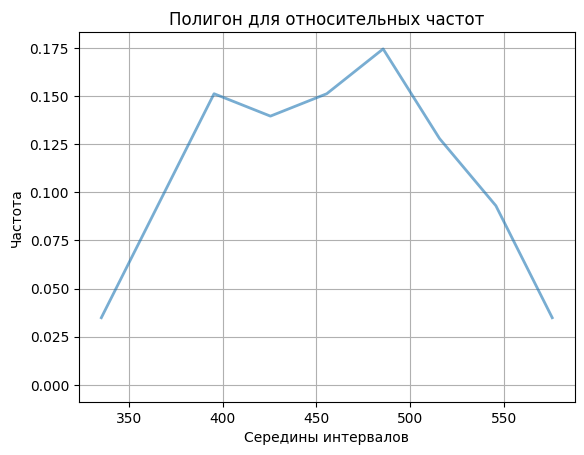

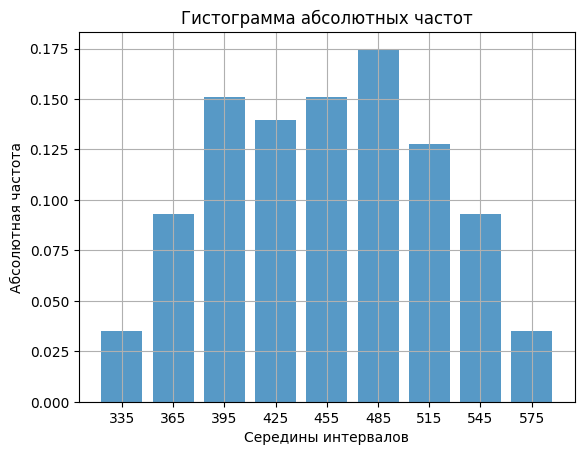

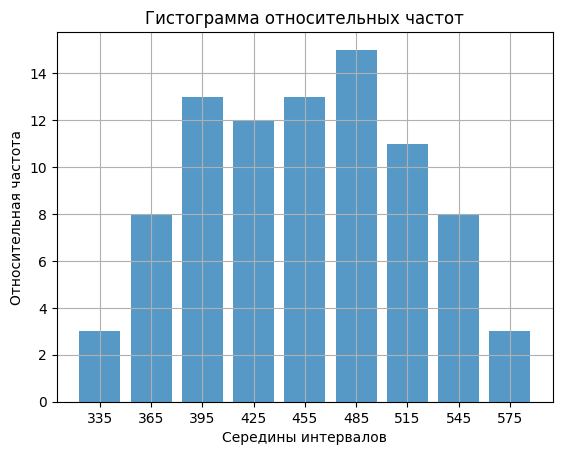

In [ ]:
print("Для nu")
poligons(interval_nu_series)

Для E


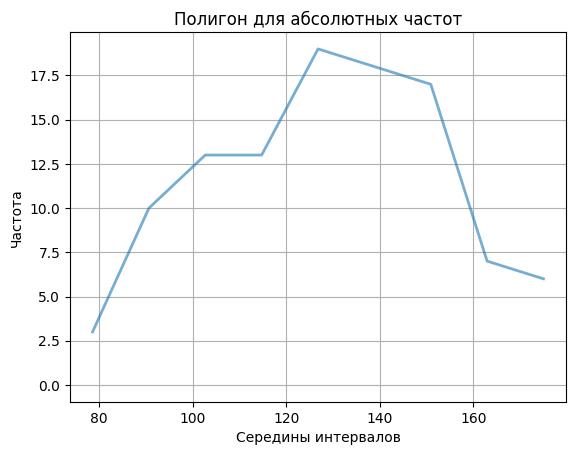

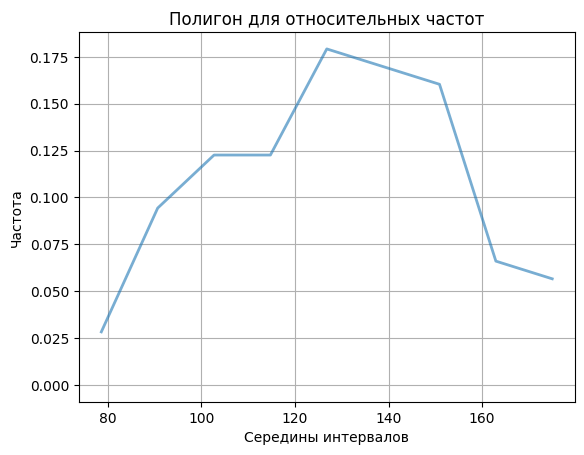

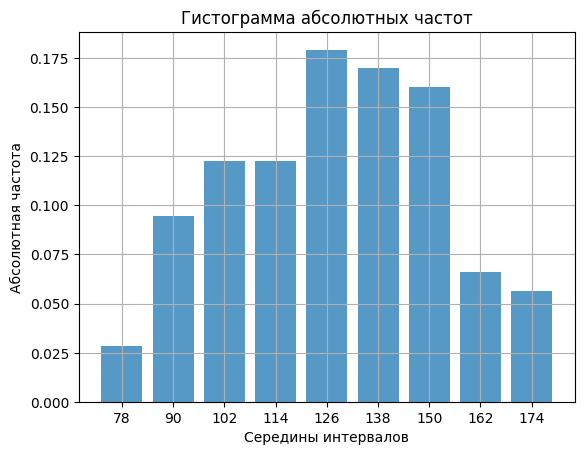

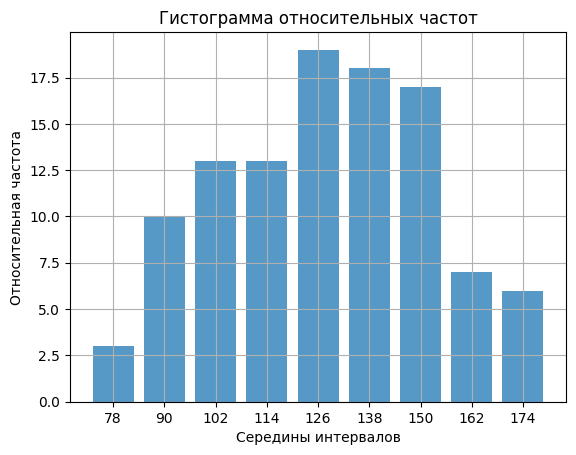

In [ ]:
print("Для E")
poligons(interval_e_series)

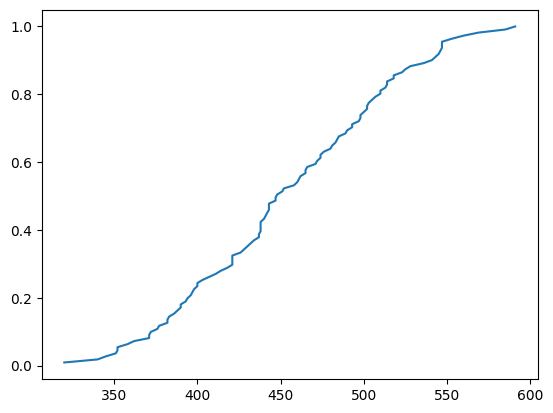

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(ranked_nu)
plt.plot(ecdf.x, ecdf.y)

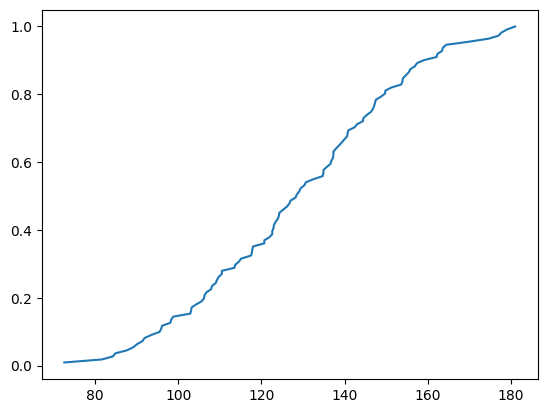

In [ ]:
ecdf = ECDF(ranked_e)
plt.plot(ecdf.x, ecdf.y)

**Выводы по пункту**

1. Графики абсолютных и относительных частот совпадают.

2. Полигоны и гистограммы подтверждают ранее сделанные выводы о том, что наибольшая концентрация значений в интервальном ряду наблюдается около середины интервалов.
3. Графики эмпирических функций распределения показывают, что частота в начале резко возрастает и по мере приближения к концу постепенно снижается.

##Вывод


Работа выполнена на языке программирования Python. В процессе решения поставленных задач были изучены в такие концепции, как генеральная совокупность, выборка, ранжированный и интервальный ряды. Для наглядного представления интервальных рядов были использованы полигоны, гистограммы и эмпирические функции распределения, что помогло подготовить данные для дальнейшего статистического анализа. Анализ вариационного ряда показал, что выборка, полученная случайным образом, оказалась довольно разнообразной. Из графиков были сделаны соответствующие выводы, которые помогли лучше понять характеристики данных.